<img src = "Bayes_rule.png">

In [1]:
import pandas as pd

In [49]:
data=pd.read_csv('breast_cancer.csv')
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [4]:
p_M=data[data['diagnosis']=='M']['diagnosis'].count()/len(data)
p_M

0.37258347978910367

In [5]:
p_B=data[data['diagnosis']=='B']['diagnosis'].count()/len(data)
p_B

0.6274165202108963

In [6]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
data=data.drop('id',1)

In [8]:
data=data[['radius_mean','texture_mean','perimeter_mean','area_mean','diagnosis']]

In [32]:
data.head(20)

,radius_mean,texture_mean,perimeter_mean,area_mean,diagnosis
0,17.99,10.38,122.80,1001.0,M
1,20.57,17.77,132.90,1326.0,M
2,19.69,21.25,130.00,1203.0,M
3,11.42,20.38,77.58,386.1,M
4,20.29,14.34,135.10,1297.0,M
5,12.45,15.70,82.57,477.1,M
6,18.25,19.98,119.60,1040.0,M
7,13.71,20.83,90.20,577.9,M
8,13.00,21.82,87.50,519.8,M
9,12.46,24.04,83.97,475.9,M


In [9]:
data1=data[data['diagnosis']=='M']

In [10]:
data2=data[data['diagnosis']=='B']

In [11]:
data11=data1.drop('diagnosis',1)
data22=data2.drop('diagnosis',1)

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data11_sc=sc.fit_transform(data11)
data22_sc=sc.fit_transform(data22)

In [13]:
data11_sc=pd.DataFrame(data11_sc)
data22_sc=pd.DataFrame(data22_sc)
data11_sc.columns=data11.columns
data22_sc.columns=data22.columns

In [14]:
import scipy.stats as stats

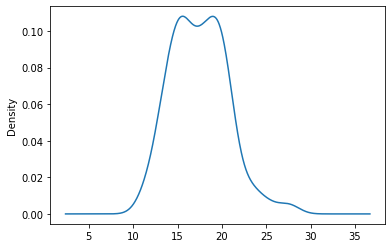

In [36]:
data11['radius_mean'].plot(kind='kde')

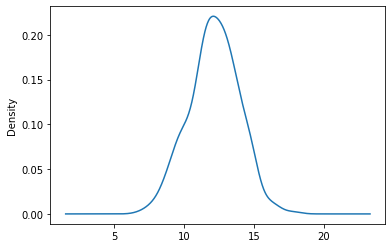

In [37]:
data22['radius_mean'].plot(kind='kde')

In [50]:
kk=stats.gaussian_kde(data11['radius_mean']).pdf(15)
kk

array([0.10534476])

In [41]:
import numpy as np
#test=np.array([17,20,117,963])
#test=np.array([17.9,10.38,122.80,1001.0])
test=np.array([13.54,14.36,87.46,566.3])
#test_sc=sc.fit_transform(test)

In [42]:
kde1=p_M*stats.gaussian_kde(data11['radius_mean']).pdf(test[0])*stats.gaussian_kde(data11['texture_mean']).pdf(test[1])*stats.gaussian_kde(data11['perimeter_mean']).pdf(test[2])*stats.gaussian_kde(data11['area_mean']).pdf(test[3])
kde2=p_B*stats.gaussian_kde(data22['radius_mean']).pdf(test[0])*stats.gaussian_kde(data22['texture_mean']).pdf(test[1])*stats.gaussian_kde(data22['perimeter_mean']).pdf(test[2])*stats.gaussian_kde(data22['area_mean']).pdf(test[3])
#kde1_sc=stats.gaussian_kde(data11_sc['radius_mean']).pdf(test[0])*stats.gaussian_kde(data11_sc['texture_mean']).pdf(test[1])*stats.gaussian_kde(data11_sc['perimeter_mean']).pdf(test[2])*stats.gaussian_kde(data11_sc['area_mean']).pdf(test[3])
#kde2_sc=stats.gaussian_kde(data22_sc['radius_mean']).pdf(test[0])*stats.gaussian_kde(data22_sc['texture_mean']).pdf(test[1])*stats.gaussian_kde(data22_sc['perimeter_mean']).pdf(test[2])*stats.gaussian_kde(data22_sc['area_mean']).pdf(test[3])


In [43]:
print(kde1)
print(kde2)
#print(kde1_sc)
#print(kde2_sc)
if kde1>kde2:
    print('The sample is Mallignant')
else:
    print('The sample is Benign')

[3.22339838e-09]
[4.47645249e-07]
The sample is Benign
